In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
df=pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')

**Importing necessary packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Data Exploration**

In [ ]:
df.info()

In [ ]:
df.head()

**Generating output variable**

In [ ]:
#we need to check whether a patient admitted within 30 days or not
df['target']=(df['readmitted']=='<30').astype('int')

#dropping readmitted column
df.drop(['readmitted'],axis=1,inplace=True)

**Target variable**

In [ ]:
x=df['target'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

* **There is clearly a class imbalace problem.**

In [ ]:
Count_Target_0 = len(df[df["target"]==0])
Count_Target_1 = len(df[df["target"]==1])

Percentage_of_Target_0 = Count_Target_0/(Count_Target_0+Count_Target_1)
print("percentage of Target 0 is",Percentage_of_Target_0*100)

Percentage_of_Target_1= Count_Target_1/(Count_Target_0+Count_Target_1)
print("percentage of Target 1 is",Percentage_of_Target_1*100)

**Hence in data there is only 11 % are the readmitted patients,now we have to do resampling of this data **

**Resampling**

**Before re sampling lets have look at the different accuracy matrices:**

* TP = True possitive means no of possitve cases which are predicted possitive

* TN = True negative means no of negative cases which are predicted negative

* FP = False possitve means no of negative cases which are predicted possitive

* FN= False Negative means no of possitive cases which are predicted negative

**Confusion Matrix: a table showing correct predictions and types of incorrect predictions.**

**Precision(TP/(TP+FP))** : The number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

**Recall(TP/(TP+FN))**: The number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

**Resampling:**

A widely adopted technique for dealing with highly unbalanced datasets is called resampling

**Undersampling**: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

 **Oversampling**: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class.
 
 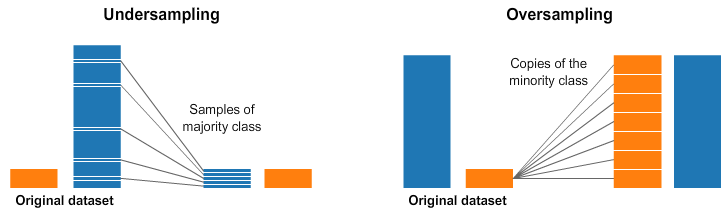

In [ ]:
not_readmitted=df[df.target==0]
readmitted=df[df.target==1]

**Oversampling**

In [ ]:
#upsample minority
readmitted_upsampled = resample(readmitted,
                          replace=True, # sample with replacement
                          n_samples=len(not_readmitted), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([not_readmitted, readmitted_upsampled])

# check new class counts
upsampled.target.value_counts()

In [ ]:
y=upsampled.target.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('upsampled data class count')
plt.ylabel('count')

**After upsampling the dataset,Plot shows an equal number of classes.**

**Undersampling**

In [ ]:
not_readmitted_downsampled = resample(not_readmitted,
                                replace = False, # sample without replacement
                                n_samples = len(readmitted), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_readmitted_downsampled, readmitted])

# checking counts
downsampled.target.value_counts()

In [ ]:
y=downsampled.target.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('downsampled data class count')
plt.ylabel('count')

**Note :** If your dataset has large number of records and you dont worry about data loss do undersampling.In other hand, if you concerned about data loss then do oversampling.